<a href="https://colab.research.google.com/github/vidhyavasan2002/LGMVIP-Datascience_2023/blob/main/TASK7_Develop_A_Neural_Network_That_Can_Read_Handwriting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Task - 7 Develop A Neural Network That Can Read Handwriting
##### Author: Vidhya lakshmi Srinivasan 


**Link for the dataset:** http://yann.lecun.com/exdb/mnist/

# Importing the necessary libraries

In [1]:
import numpy as np
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt

# Loading the MNIST dataset

In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


# Visualizing the dataset

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
Y_train.shape

(60000,)

In [5]:
X_test.shape

(10000, 28, 28)

### Checking the values of each pixel before the normalization process

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

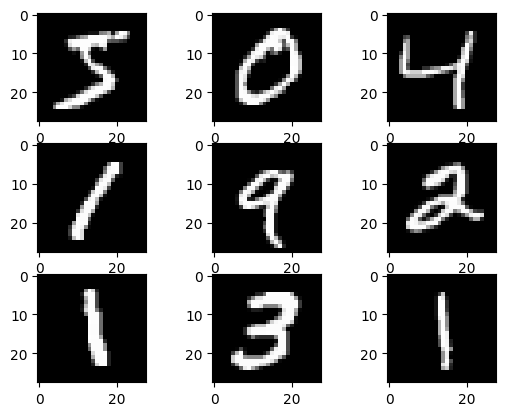

In [7]:
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
plt.show()

### Reshaping the data

In [8]:
X_train_r = X_train.reshape(X_train.shape[0], X_train.shape[2], X_train.shape[2], 1)
X_test_r = X_test.reshape(X_test.shape[0], X_test.shape[2], X_test.shape[2], 1)

## Normalizing the data

In [9]:
X_train_r = tf.keras.utils.normalize(X_train_r, axis = 1)
X_test_r = tf.keras.utils.normalize(X_test_r, axis = 1)

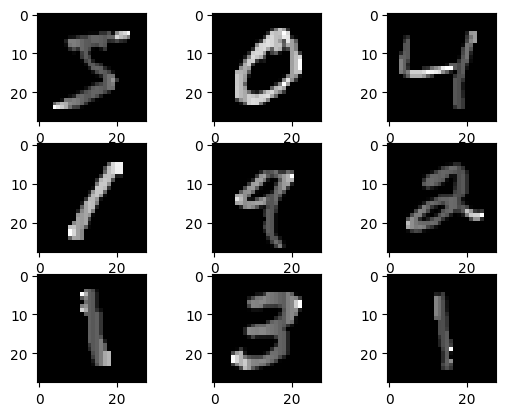

In [10]:
for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.imshow(np.squeeze(X_train_r[i]), cmap=plt.get_cmap('gray'))
plt.show()

# Creating a simple CNN Model

In [11]:
image_shape = X_train_r.shape[1:]
print(image_shape)

(28, 28, 1)


In [12]:
model = model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(48, (3,3), activation = tf.nn.relu, input_shape = image_shape))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation = tf.nn.relu))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

In [ ]:

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(X_train_r, Y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 98s 52ms/step - loss: 0.1818 - accuracy: 0.9436
Epoch 2/10
1875/1875 [==============================] - 101s 54ms/step - loss: 0.0721 - accuracy: 0.9772
Epoch 3/10
1875/1875 [==============================] - 101s 54ms/step - loss: 0.0533 - accuracy: 0.9828
Epoch 4/10
 715/1875 [==========>...................] - ETA: 1:00 - loss: 0.0435 - accuracy: 0.9864

### Summary of the CNN Model

In [ ]:
model.summary()

### Plotting the CNN Model

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model2, 'model.jpg', show_shapes = True)

# Evaluating the model based on validation loss and validation accuracy

In [ ]:
val_loss, val_accuracy = model.evaluate(X_test, Y_test)
print("Validation loss : ", val_loss*100, "%")
print("Validation accuracy : ", val_accuracy*100,"%")

### Saving the model

In [ ]:
model.save('/content/drive/MyDrive/Machine Learning Projects/Mnist.model')

## Predicting a random test case 

In [ ]:
new_model = tf.keras.models.load_model("/content/drive/MyDrive/Machine Learning Projects/Mnist.model")


In [ ]:
predictions = new_model.predict(X_test)

In [ ]:
plt.imshow(X_test[80], cmap = plt.get_cmap('binary'))

In [ ]:
print("The prediction is : ", np.argmax(predictions[80]))

## Thank You!